In [1]:
!gdown 1cWlhxrAzmbZmDr2K-MwGksjVNHoQISL8

Downloading...
From (original): https://drive.google.com/uc?id=1cWlhxrAzmbZmDr2K-MwGksjVNHoQISL8
From (redirected): https://drive.google.com/uc?id=1cWlhxrAzmbZmDr2K-MwGksjVNHoQISL8&confirm=t&uuid=bc49ccd0-97b1-45ae-b3fb-3334daa40a3c
To: /content/input-big-data.txt
100% 2.64G/2.64G [00:41<00:00, 64.1MB/s]


In [2]:
!gdown 1bl0E6f9BGtd9j88m6QqeixbhZ-Mn22JX

Downloading...
From: https://drive.google.com/uc?id=1bl0E6f9BGtd9j88m6QqeixbhZ-Mn22JX
To: /content/output-accpr-2d-big-data.txt
100% 12.2M/12.2M [00:00<00:00, 61.3MB/s]


###Bibliotecas

In [3]:
import re
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
import gc
import time

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.model_selection import KFold

###Ambiente

In [4]:
input_txt = 'input-big-data.txt'

np.set_printoptions(suppress=True)
file1 = open(input_txt, 'r')
labels=[]
dim=-1

d1, d2, d3  = [540, 540, 51]

labeledDf1 = {}
labeledDf2 = {}

while True:
    line = file1.readline()

    if not line:
        break

    arrline = re.split(r'[ ]+', line.strip())
    if len(arrline) == 1:
        labels.append(arrline[0])
        dim+=1
        if dim<10:
            labeledDf1[labels[dim]] = np.zeros((d1,d2,d3))
        else:
            labeledDf2[labels[dim-10]] = np.zeros((d1,d2))
    else:
        if dim<10:
            idx, idy = np.array(arrline[0:2], dtype=int)
            labeledDf1[labels[dim]][idx-1][idy-1] = np.array(arrline[2:], dtype=float)
        else:
            idx, idy = np.array(arrline[0:2], dtype=int)
            labeledDf2[labels[dim-10]][idx-1][idy-1] = arrline[2]

file1.close()

matrix1 = []
for i in range(d1):
    for j in range(d2):
        for k in range(d3):
            array = []
            for v in labeledDf1.values():
                array.append(float(v[i][j][k]))
            matrix1.append([i+1,j+1,int(k+1),*array])
del labeledDf1
gc.collect()

matrix2 = []
for i in range(d1):
    for j in range(d2):
        array = []
        for v in labeledDf2.values():
            array.append(float(v[i][j]))
        matrix2.append([i+1,j+1,*array])
del labeledDf2
gc.collect()

df_input1 = pd.DataFrame(matrix1, columns=['X', 'Y', 'Z', *labels[:10]])
del matrix1
gc.collect()

df_input2 = pd.DataFrame(matrix2, columns=['X', 'Y', *labels[10:]])
del matrix2
gc.collect()

0

In [ ]:
# df_input1

In [ ]:
# df_input2

In [5]:
output_txt = 'output-accpr-2d-big-data.txt'
df_output =  pd.read_csv(output_txt, sep='\s+', skiprows=1, header=None)
df_output.columns = ['X', 'Y', 'accpr_output']
df_output

,X,Y,accpr_output
0,1,1,0.0
1,1,2,0.0
2,1,3,0.0
3,1,4,0.0
4,1,5,0.0
...,...,...,...
291595,540,536,0.0
291596,540,537,0.0
291597,540,538,0.0
291598,540,539,0.0


###Exploração da Base de Dados

df_input1

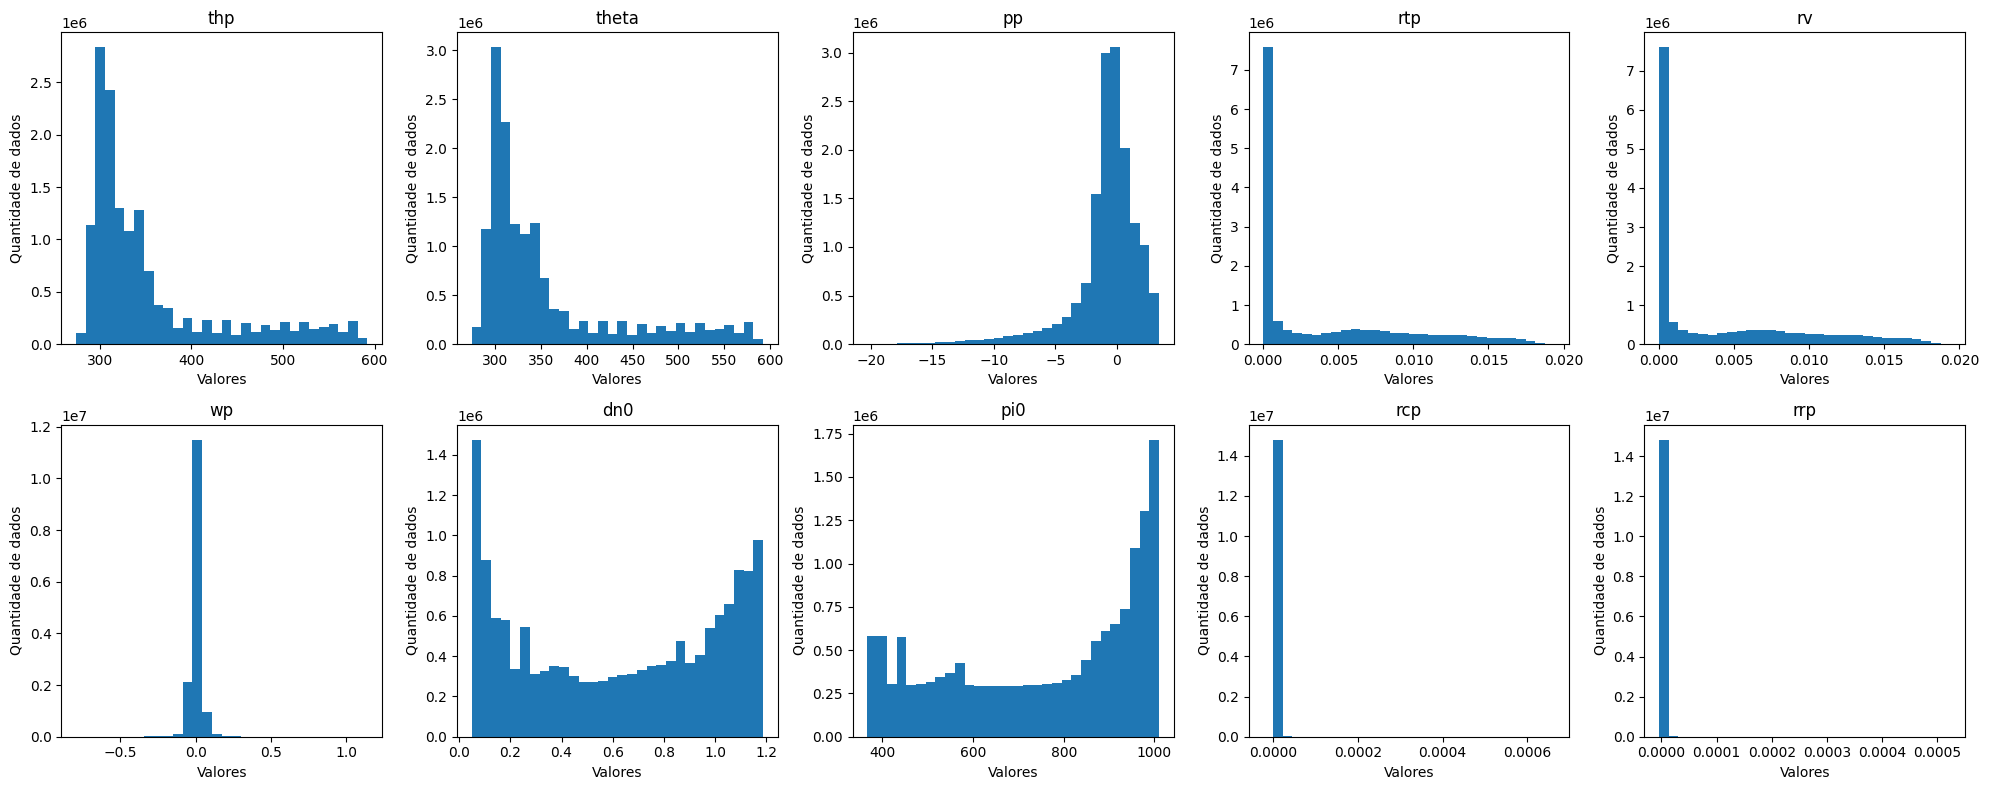

In [ ]:
# Distribuição de variáveis numéricas

# Criar uma figura com dez subplots (2 linhas, 5 colunas)
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Gerar gráficos para 10 colunas (exemplo genérico, substitua pelas suas variáveis)
for i in range(10):
    linha = i // 5    # Definir a linha do subplot
    coluna = i % 5    # Definir a coluna do subplot

    axs[linha, coluna].hist(df_input1[f'{labels[i]}'], bins=30)  # Histograma
    axs[linha, coluna].set_title(f'{labels[i]}')
    axs[linha, coluna].set_xlabel('Valores')
    axs[linha, coluna].set_ylabel('Quantidade de dados')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

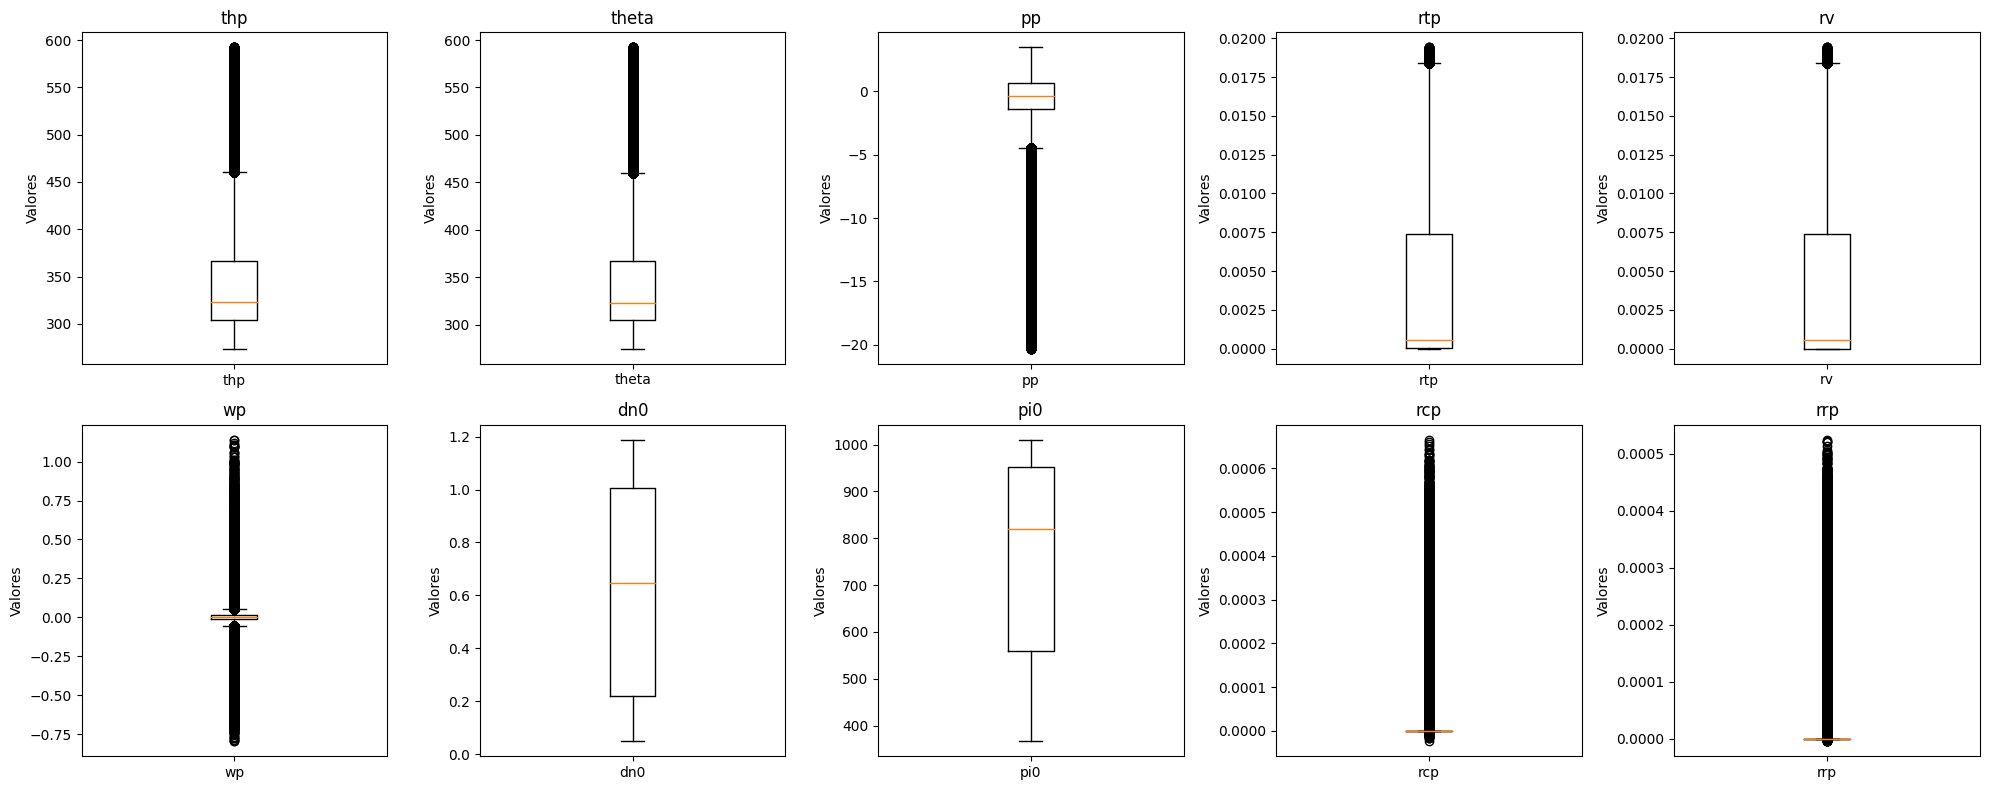

In [ ]:
# Criar uma figura com dez subplots (2 linhas, 5 colunas)
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Gerar gráficos para 10 colunas (exemplo genérico, substitua pelas suas variáveis)
for i in range(10):
    linha = i // 5    # Definir a linha do subplot
    coluna = i % 5    # Definir a coluna do subplot

    axs[linha, coluna].boxplot(df_input1[f'{labels[i]}'], vert=True)  # Boxplot vertical
    axs[linha, coluna].set_title(f'{labels[i]}')
    axs[linha, coluna].set_ylabel('Valores')
    axs[linha, coluna].set_xticklabels([f'{labels[i]}'])  # Ajustar rótulo do eixo x para o nome da variável

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

df_input2

<ipython-input-10-90358476b57c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([f'{labels[i+10]}'])  # Ajustar rótulo do eixo x para o nome da variável


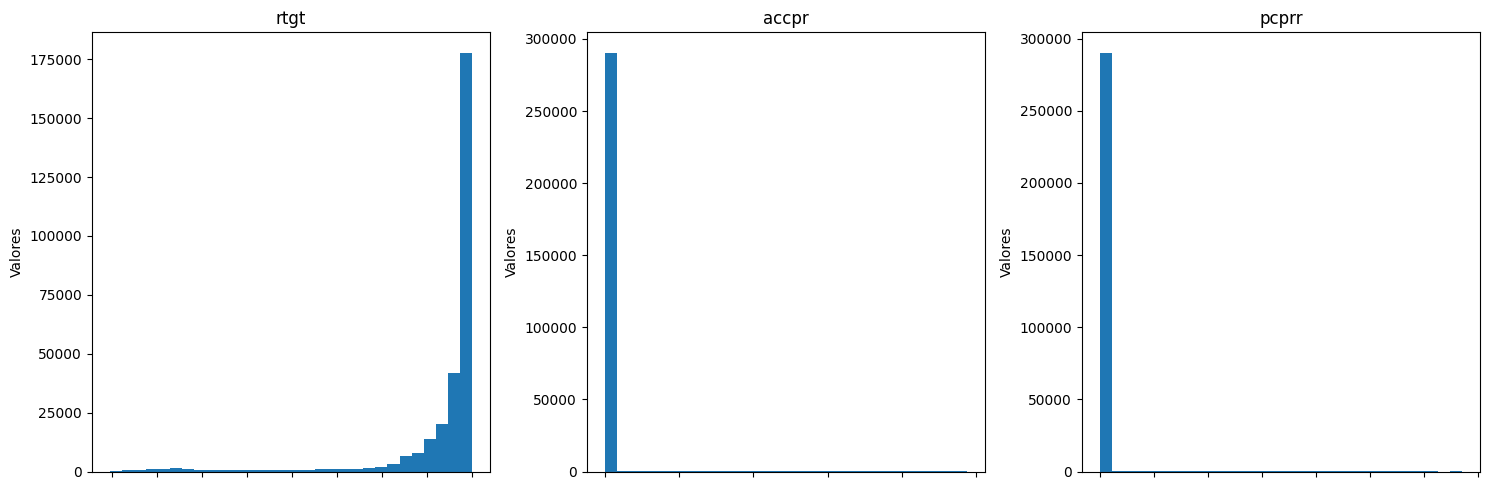

In [ ]:
# Criar uma figura com três subplots (1 linha, 3 colunas)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gerar gráficos para 3 colunas
for i in range(3):
    axs[i].hist(df_input2[f'{labels[i+10]}'], bins=30)  # Boxplot vertical
    axs[i].set_title(f'{labels[i+10]}')
    axs[i].set_ylabel('Valores')
    axs[i].set_xticklabels([f'{labels[i+10]}'])  # Ajustar rótulo do eixo x para o nome da variável

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

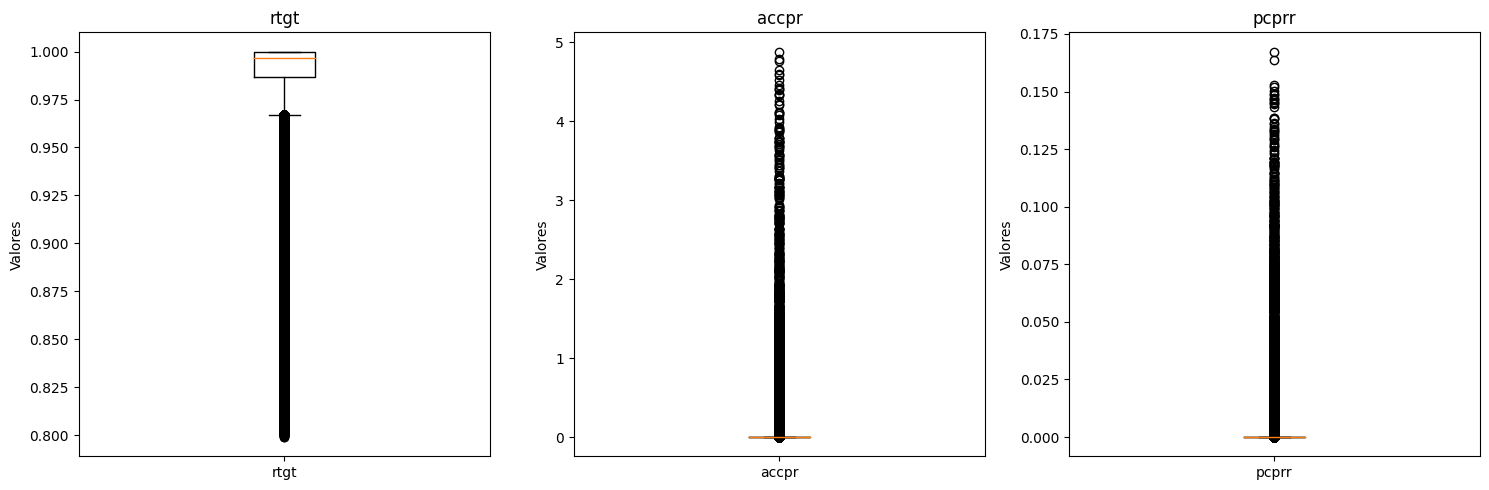

In [ ]:
# Criar uma figura com três subplots (1 linha, 3 colunas)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gerar gráficos para 3 colunas
for i in range(3):
    axs[i].boxplot(df_input2[f'{labels[i+10]}'], vert=True)  # Boxplot vertical
    axs[i].set_title(f'{labels[i+10]}')
    axs[i].set_ylabel('Valores')
    axs[i].set_xticklabels([f'{labels[i+10]}'])  # Ajustar rótulo do eixo x para o nome da variável

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

df_output

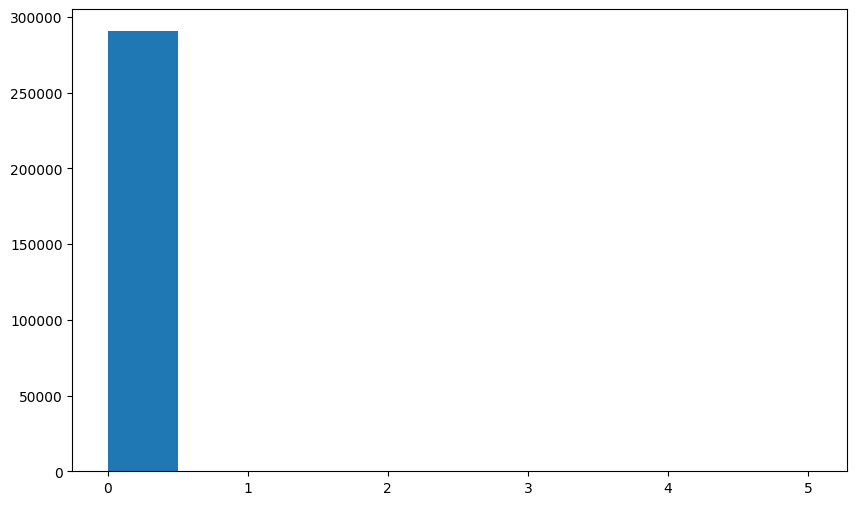

In [ ]:
# Definir o tamanho da figura (em polegadas)
plt.figure(figsize=(10, 6))

# Criar o histograma
plt.hist(df_output['accpr_output'])

# Exibir o gráfico
plt.show()

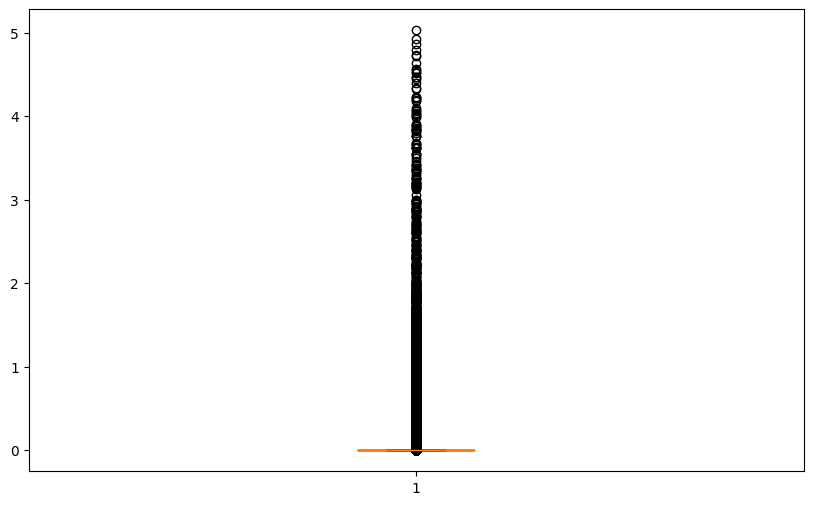

In [ ]:
# Definir o tamanho da figura (em polegadas)
plt.figure(figsize=(10, 6))

# Criar o boxplot
plt.boxplot(df_output['accpr_output'], vert=True)

# Exibir o gráfico
plt.show()

##Pré-Processamento


###Verificação Dados

Verificação em:
1.   Nome das Colunas
2.   Contagem de Não-Nulos
3.   Tipos de Dados

In [ ]:
df_input1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14871600 entries, 0 to 14871599
Data columns (total 13 columns):
 #   Column  Dtype  
---  ------  -----  
 0   X       int64  
 1   Y       int64  
 2   Z       int64  
 3   thp     float64
 4   theta   float64
 5   pp      float64
 6   rtp     float64
 7   rv      float64
 8   wp      float64
 9   dn0     float64
 10  pi0     float64
 11  rcp     float64
 12  rrp     float64
dtypes: float64(10), int64(3)
memory usage: 1.4 GB


In [ ]:
df_input2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291600 entries, 0 to 291599
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X       291600 non-null  int64  
 1   Y       291600 non-null  int64  
 2   rtgt    291600 non-null  float64
 3   accpr   291600 non-null  float64
 4   pcprr   291600 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 11.1 MB


In [ ]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291600 entries, 0 to 291599
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   X             291600 non-null  int64  
 1   Y             291600 non-null  int64  
 2   accpr_output  291600 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 6.7 MB


###Descrição dos Dados

Resumo de:
1.   Contagem
2.   Média
3.   Desvio Padrão
4.   Mínimo e Máximo para variáveis numéricas
5.   Quartis

In [ ]:
df_input1.describe()

,X,Y,Z,thp,theta,pp,rtp,rv,wp,dn0,pi0,rcp,rrp
count,1.487160e+07,1.487160e+07,1.487160e+07,1.487160e+07,1.487160e+07,1.487160e+07,1.487160e+07,1.487160e+07,1.487160e+07,1.487160e+07,1.487160e+07,1.487160e+07,1.487160e+07
mean,2.705000e+02,2.705000e+02,2.600000e+01,3.547434e+02,3.547531e+02,-8.067291e-01,3.938236e-03,3.935102e-03,1.759342e-03,6.202159e-01,7.564950e+02,6.953717e-07,2.965401e-07
std,1.558843e+02,1.558843e+02,1.471960e+01,7.620244e+01,7.619734e+01,2.727163e+00,5.150739e-03,5.150460e-03,3.781700e-02,3.935493e-01,2.114008e+02,1.185351e-05,6.948965e-06
min,1.000000e+00,1.000000e+00,1.000000e+00,2.737772e+02,2.747188e+02,-2.029796e+01,-8.419483e-06,1.000000e-12,-7.955880e-01,4.868769e-02,3.667933e+02,-2.363816e-05,-4.618559e-06
25%,1.357500e+02,1.357500e+02,1.300000e+01,3.045209e+02,3.045280e+02,-1.404411e+00,6.993681e-06,6.725726e-06,-1.265420e-02,2.197348e-01,5.599974e+02,0.000000e+00,0.000000e+00
50%,2.705000e+02,2.705000e+02,2.600000e+01,3.228914e+02,3.228970e+02,-4.111154e-01,5.371818e-04,5.357362e-04,0.000000e+00,6.485715e-01,8.198071e+02,0.000000e+00,0.000000e+00
75%,4.052500e+02,4.052500e+02,3.900000e+01,3.667212e+02,3.667240e+02,6.516366e-01,7.375590e-03,7.371615e-03,1.480045e-02,1.007169e+00,9.529391e+02,0.000000e+00,0.000000e+00
max,5.400000e+02,5.400000e+02,5.100000e+01,5.922418e+02,5.922390e+02,3.446083e+00,1.941193e-02,1.941000e-02,1.139375e+00,1.187878e+00,1.009855e+03,6.649753e-04,5.240834e-04


In [ ]:
df_input2.describe()

,X,Y,rtgt,accpr,pcprr
count,291600.000000,291600.000000,291600.000000,291600.000000,291600.000000
mean,270.500000,270.500000,0.985464,0.005677,0.000248
std,155.884573,155.884573,0.031699,0.101623,0.003978
min,1.000000,1.000000,0.799032,0.000000,0.000000
25%,135.750000,135.750000,0.986788,0.000000,0.000000
50%,270.500000,270.500000,0.996571,0.000000,0.000000
75%,405.250000,405.250000,1.000000,0.000000,0.000000
max,540.000000,540.000000,1.000000,4.879451,0.167345


In [ ]:
df_output.describe()

,X,Y,accpr_output
count,291600.000000,291600.000000,291600.000000
mean,270.500000,270.500000,0.005925
std,155.884573,155.884573,0.105372
min,1.000000,1.000000,0.000000
25%,135.750000,135.750000,0.000000
50%,270.500000,270.500000,0.000000
75%,405.250000,405.250000,0.000000
max,540.000000,540.000000,5.028822


###Dados Ausentes

In [ ]:
df_input1.isna().sum()

,0
X,0
Y,0
Z,0
thp,0
theta,0
pp,0
rtp,0
rv,0
wp,0
dn0,0


In [ ]:
df_input2.isna().sum()

,0
X,0
Y,0
rtgt,0
accpr,0
pcprr,0


In [ ]:
df_output.isna().sum()

,0
X,0
Y,0
accpr_output,0


###Dados Duplicados

In [ ]:
df_input1.duplicated().sum()

0

In [ ]:
df_input2.duplicated().sum()

0

In [ ]:
df_output.duplicated().sum()

0

###Normalização

In [6]:
#normalização df_input1
df_input1 = df_input1.drop(['X', 'Y', 'Z'], axis=1)
df_input1 = scaler.fit_transform(df_input1)
df_input1 = pd.DataFrame(df_input1, columns=[*labels[:10]])
df_input1

,thp,theta,pp,rtp,rv,wp,dn0,pi0,rcp,rrp
0,0.026324,0.023458,0.855477,0.270398,2.706556e-01,0.411164,9.999997e-01,9.999998e-01,0.034327,0.008736
1,0.026334,0.023458,0.850931,0.270307,2.706556e-01,0.414569,9.943138e-01,9.965666e-01,0.034327,0.008736
2,0.026706,0.023828,0.845976,0.231502,2.312712e-01,0.415854,9.881373e-01,9.928244e-01,0.034327,0.008736
3,0.026781,0.023895,0.840575,0.229000,2.288097e-01,0.416058,9.814303e-01,9.887454e-01,0.034327,0.008736
4,0.026757,0.023870,0.834690,0.230020,2.298688e-01,0.416131,9.741495e-01,9.842992e-01,0.034327,0.008736
...,...,...,...,...,...,...,...,...,...,...
14871595,0.724443,0.723575,0.844886,0.000450,1.633289e-05,0.427160,2.668782e-02,8.473098e-02,0.034327,0.008736
14871596,0.781415,0.780735,0.846368,0.000434,5.151887e-07,0.419988,1.871115e-02,6.242020e-02,0.034327,0.008736
14871597,0.839520,0.839019,0.847538,0.000434,5.151470e-07,0.414311,1.165259e-02,4.088771e-02,0.034327,0.008736
14871598,0.899824,0.899505,0.848568,0.000434,5.151470e-07,0.411164,5.456898e-03,2.009574e-02,0.034327,0.008736


In [7]:
#normalização df_input2
df_input2 = df_input2.drop(['X', 'Y'], axis=1)
df_input2 = scaler.fit_transform(df_input2)
df_input2 = pd.DataFrame(df_input2, columns=[*labels[10:]])
df_input2

,rtgt,accpr,pcprr
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
291595,1.0,0.0,0.0
291596,1.0,0.0,0.0
291597,1.0,0.0,0.0
291598,1.0,0.0,0.0


In [8]:
#normalização df_output
df_output = df_output.drop(['X', 'Y'], axis=1)
df_output = scaler.fit_transform(df_output)
df_output = pd.DataFrame(df_output, columns=['accpr_output'])
df_output

,accpr_output
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
291595,0.0
291596,0.0
291597,0.0
291598,0.0


###Correlação

####Correlação por dataframe individualmente. (df_input1 e df_input2)

<Axes: >

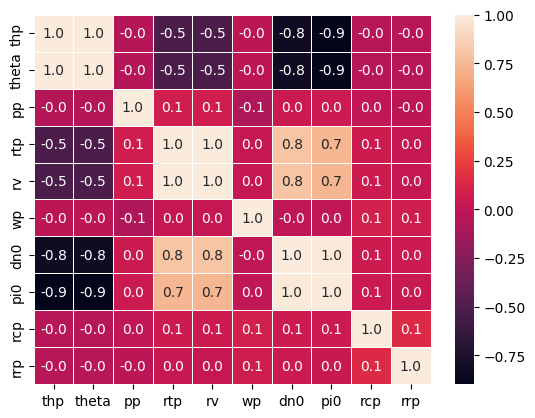

In [ ]:
correlation_df1 = df_input1.corr()
plot = sn.heatmap(correlation_df1, annot = True, fmt=".1f", linewidths=.6)
plot

<Axes: >

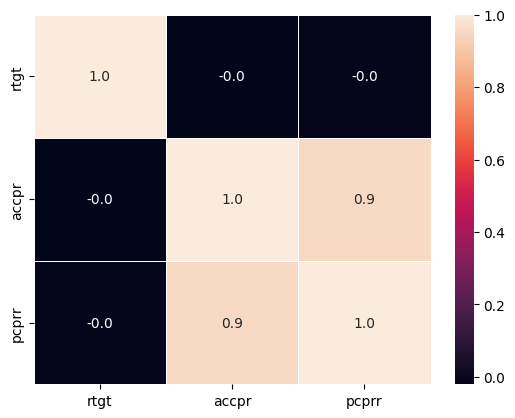

In [ ]:
correlation_df2 = df_input2.corr()
plot = sn.heatmap(correlation_df2, annot = True, fmt=".1f", linewidths=.6)
plot

#### Unindo variáveis 2D em um único dataframe para avaliar correlação. (df)

<Axes: >

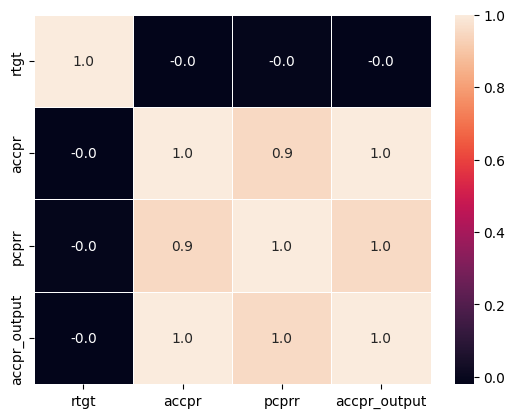

In [ ]:
df = df_input2.copy()
df['accpr_output'] = df_output['accpr_output']

correlation = df.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

##Preparação para Treinamento

In [9]:
#df 513 + 1
df = df_input1
def group_into_vectors(df, window_size):
    # Inicializa um dicionário para armazenar os vetores agrupados
    grouped_data = {col: [] for col in df.columns}

    for col in df.columns:
        column_data = df[col].values
        num_vectors = len(column_data) // window_size

        # Divide a coluna em vetores de tamanho window_size
        for i in range(num_vectors):
            start_index = i * window_size
            end_index = start_index + window_size
            vector = column_data[start_index:end_index]
            grouped_data[col].append(vector)

    return grouped_data

# Define o tamanho do vetor (d3 linhas)
window_size = d3
grouped_data = group_into_vectors(df, window_size)

# Cria DataFrames a partir dos dados agrupados
def create_dataframe_from_grouped_data(grouped_data):
    dfs = []
    for col, vectors in grouped_data.items():
        df_col = pd.DataFrame(vectors, columns=[f'{col}_{i+1}' for i in range(window_size)])
        dfs.append(df_col)

    # Concatena os DataFrames coluna a coluna
    return pd.concat(dfs, axis=1)

# Cria o novo DataFrame
df_grouped = create_dataframe_from_grouped_data(grouped_data)
df = df_grouped.copy()
del df_grouped
gc.collect()

0

In [10]:
#unindo todos os df - rtgt	accpr	pcprr
df['rtgt'] = df_input2['rtgt']
df['accpr'] = df_input2['accpr']
df['pcprr'] = df_input2['pcprr']
df['accpr_output'] = df_output['accpr_output']
print(df)

           thp_1     thp_2     thp_3     thp_4     thp_5     thp_6     thp_7  \
0       0.026324  0.026334  0.026706  0.026781  0.026757  0.026745  0.026807   
1       0.026328  0.026338  0.026711  0.026786  0.026762  0.026749  0.026812   
2       0.026427  0.026437  0.026780  0.026844  0.026819  0.026806  0.026872   
3       0.026625  0.026635  0.026894  0.026944  0.026920  0.026908  0.026978   
4       0.026841  0.026851  0.027032  0.027073  0.027050  0.027040  0.027114   
...          ...       ...       ...       ...       ...       ...       ...   
291595  0.073705  0.073715  0.073907  0.074217  0.074537  0.075071  0.076982   
291596  0.073867  0.073876  0.074058  0.074336  0.074658  0.075178  0.076944   
291597  0.074012  0.074022  0.074200  0.074449  0.074762  0.075285  0.077004   
291598  0.074109  0.074118  0.074299  0.074542  0.074839  0.075352  0.077062   
291599  0.074109  0.074119  0.074299  0.074542  0.074838  0.075352  0.077065   

           thp_8     thp_9    thp_10  .

In [ ]:
#Divisão Treino e Teste
data_train = df.sample(frac=0.8,random_state=0)
data_test = df.drop(data_train.index)
data_train.columns

X_train = data_train.drop(['accpr_output'], axis=1).values
Y_train = data_train['accpr_output'].values

X_test = data_test.drop(['accpr_output'], axis=1).values
Y_test = data_test['accpr_output'].values

In [11]:
np.random.seed(0)

#MLP

In [ ]:
#MLP Regressor
#se quiser exibir cada epoca é só colocar verbose=True como parametro

mlp = MLPRegressor(random_state=0, max_iter=500, tol=0.000000001, activation='tanh')

inicio = time.time()
history = mlp.fit(X_train, Y_train)
fim = time.time()
print(f'Tempo treinamento MLP: {fim-inicio}')

mlp.out_activation_='relu' ##não permite numero negativo na saida da previsão

inicio = time.time()
Y_pred = mlp.predict(X_test)
fim = time.time()
print(f'Tempo predição MLP: {fim-inicio}')

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

print(mlp.score(X_test, Y_test))
print(f'Mean Squared Error: {mse:.8f}')
print(f'Mean Absolute Error: {mae:.8f}')
print(f'Mean Absolute Percentage Error: {mape:.8f}')

Tempo treinamento MLP: 637.6690051555634
Tempo predição MLP: 1.2237999439239502
0.9929781029240591
Mean Squared Error: 0.00000263
Mean Absolute Error: 0.00084001
Mean Absolute Percentage Error: 3426282189332.44775391


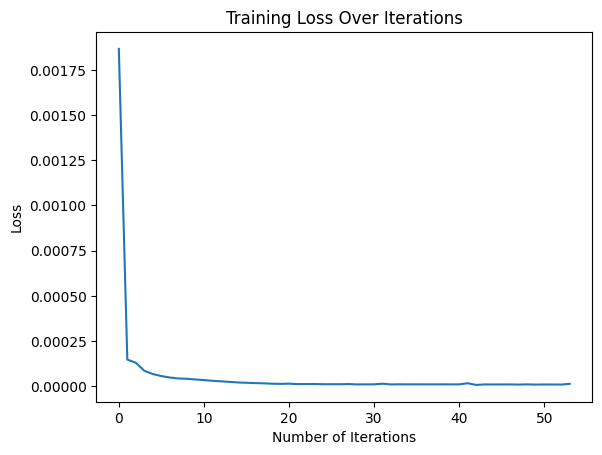

In [ ]:
#Gráficos

#Plot perda
plt.plot(range(history.n_iter_), history.loss_curve_)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Over Iterations")
plt.show()

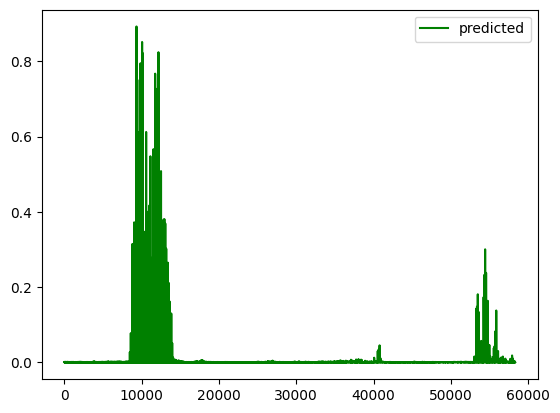

In [ ]:
# gráfico do valor previso
#(separei o valor previsto do valor real para ser mais facil visualizar)
plt.plot(Y_pred, label='predicted', color='green')
plt.legend()

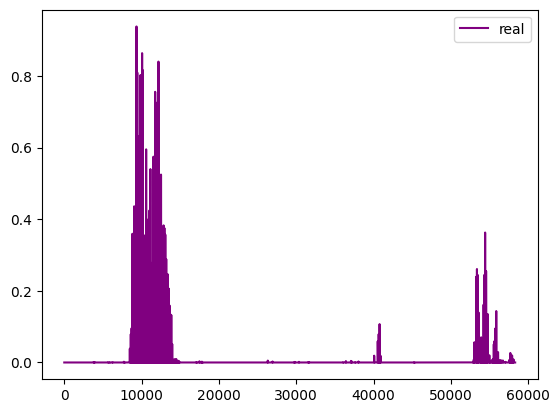

In [ ]:
# gráfico do valor previso
plt.plot(Y_test, label='real', color='purple')
plt.legend()

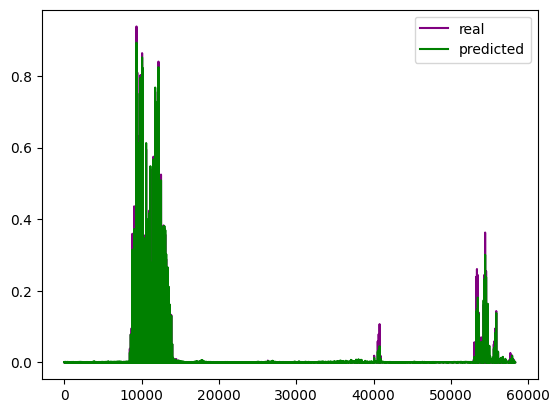

In [ ]:
# gráfico do valor previso
#(separei o valor previsto do valor real para ser mais facil visualizar)
plt.plot(Y_test, label='real', color='purple')
plt.plot(Y_pred, label='predicted', color='green')
plt.legend()

In [ ]:
X_train_todos = df.drop(['accpr_output'], axis=1).values

In [ ]:
Y_pred_todos = mlp.predict(X_train_todos)

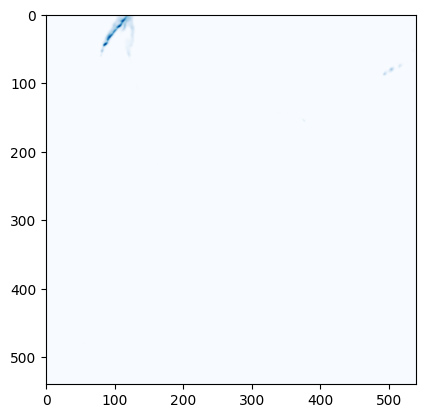

In [ ]:
# Grafico de local onde havia chuva nos dados
array = np.array(df_output).reshape(540,540).transpose()
plt.imshow(array, cmap=plt.colormaps.get('Blues'), vmin=0, vmax=1)

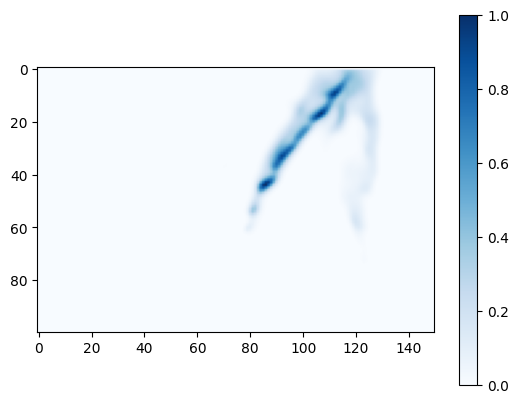

In [ ]:
# Grafico de local onde havia chuva nos dados COM ZOOM

array = array[:100,:150]
plt.imshow(array, cmap=plt.colormaps.get('Blues'), vmin=0, vmax=1)
plt.colorbar()
plt.show()

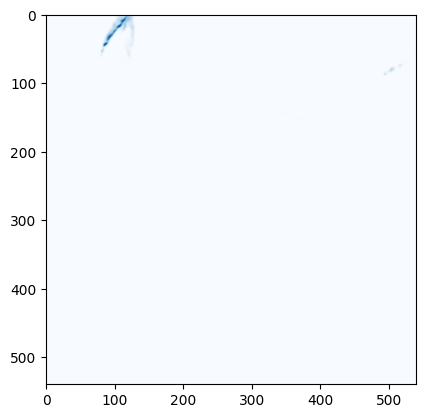

In [ ]:
# Grafico de local onde foi previsto a chuva
array = Y_pred_todos.reshape(540,540).transpose()
plt.imshow(array, cmap=plt.colormaps.get('Blues'), vmin=0, vmax=1)

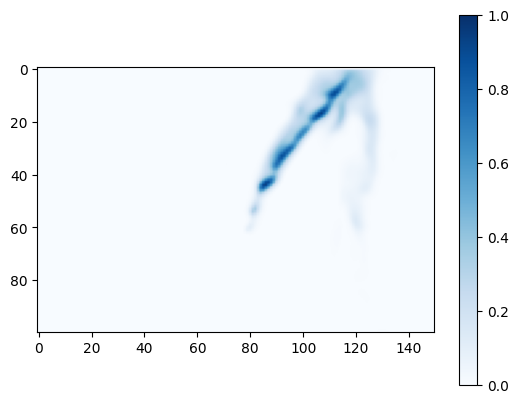

In [ ]:
# Grafico de local onde foi previsto a chuva COM ZOOM

array = array[:100,:150]
plt.imshow(array, cmap=plt.colormaps.get('Blues'),vmin=0, vmax=1)
plt.colorbar()
plt.show()

# KNN


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=355)

In [ ]:
# Criação e treino do KNN regressor

inicio = time.time()
knn_regressor.fit(X_train, Y_train)
fim = time.time()
print(f'Tempo treinamento KNN: {fim-inicio}')

# Fazer previsão com X_test
inicio = time.time()
Y_pred = knn_regressor.predict(X_test)
fim = time.time()
print(f'Tempo predição KNN: {fim-inicio}')

Tempo treinamento KNN: 0.7667829990386963
Tempo predição KNN: 753.0325727462769


In [ ]:
# Medidas de erro
mse_knn = mean_squared_error(Y_test, Y_pred)
mae_knn = mean_absolute_error(Y_test, Y_pred)
r2_knn = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse_knn:.8f}')
print(f'Mean Absolute Error: {mae_knn:.8f}')
print(f'R2 score: {r2_knn:.8f}')

Mean Squared Error: 0.00007401
Mean Absolute Error: 0.00045886
R2 score: 0.80253745


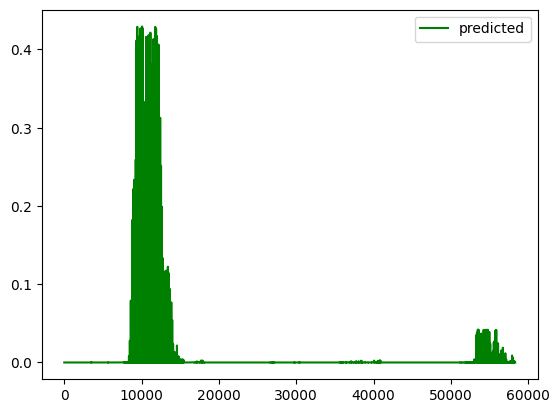

In [ ]:
# Gráfico do valor previso
plt.plot(Y_pred, label='predicted', color='green')
plt.legend()

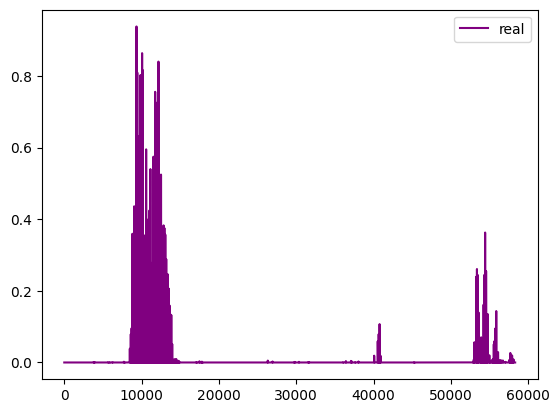

In [ ]:
# Gráfico do valor real
plt.plot(Y_test, label='real', color='purple')
plt.legend()

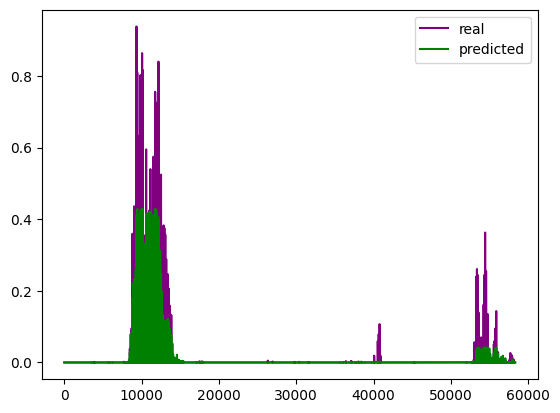

In [ ]:
# Gráficos sobrepostos
plt.plot(Y_test, label='real', color='purple')
plt.plot(Y_pred, label='predicted', color='green')
plt.legend()

#SVR


In [ ]:
#treinamento
svr = SVR(kernel='linear')

inicio = time.time()
svr.fit(X_train, Y_train)
fim = time.time()
print(f'Tempo treinamento SVR: {fim-inicio}')

inicio = time.time()
Y_pred = svr.predict(X_test)
fim = time.time()
print(f'Tempo predição SVR: {fim-inicio}')

Tempo treinamento SVR: 6.960647344589233
Tempo predição SVR: 0.2673506736755371


In [ ]:
# Medidas de erro
mse_svr = mean_squared_error(Y_test, Y_pred)
mae_svr = mean_absolute_error(Y_test, Y_pred)
r2_svr = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse_svr:.8f}')
print(f'Mean Absolute Error: {mae_svr:.8f}')
print(f'R2 score: {r2_svr:.8f}')

Mean Squared Error: 0.00035312
Mean Absolute Error: 0.01424280
R2 score: 0.05786563


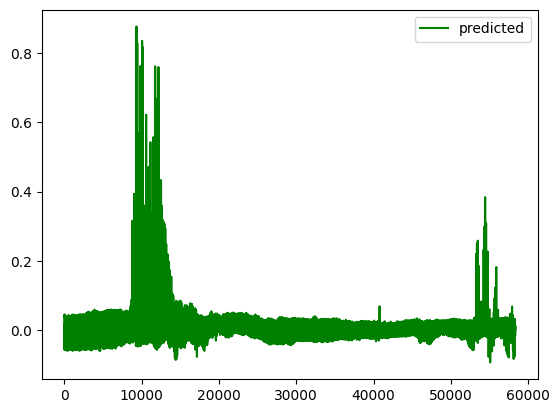

In [ ]:
# Gráfico do valor previso
plt.plot(Y_pred, label='predicted', color='green')
plt.legend()

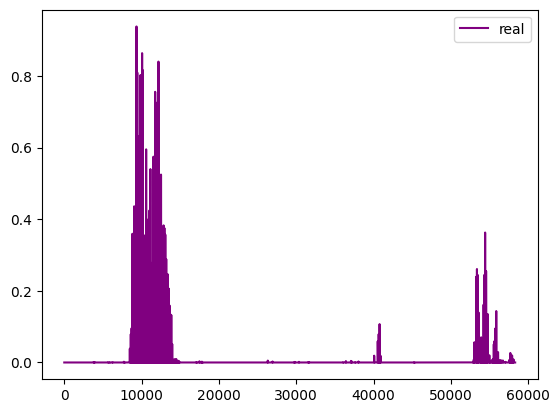

In [ ]:
# Gráfico do valor real
plt.plot(Y_test, label='real', color='purple')
plt.legend()

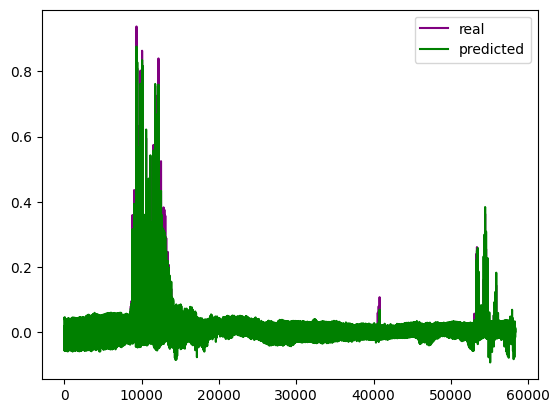

In [ ]:
# Gráficos sobrepostos
plt.plot(Y_test, label='real', color='purple')
plt.plot(Y_pred, label='predicted', color='green')
plt.legend()

#Kfold

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=0,shuffle=True)
mlp = MLPRegressor(random_state=0, max_iter=500, tol=0.000000001, activation='tanh')
mlp.out_activation_='relu' ##não permite numero negativo na saida da previsão

Fold 0:
  Train Size=(233280,)
  Test Size=(58320,)
  Train: index=[     0      1      2 ... 291597 291598 291599]
  Test:  index=[    14     24     28 ... 291582 291584 291587]
0.983767489572282
Mean Squared Error: 0.00000591
Mean Absolute Error: 0.00216399


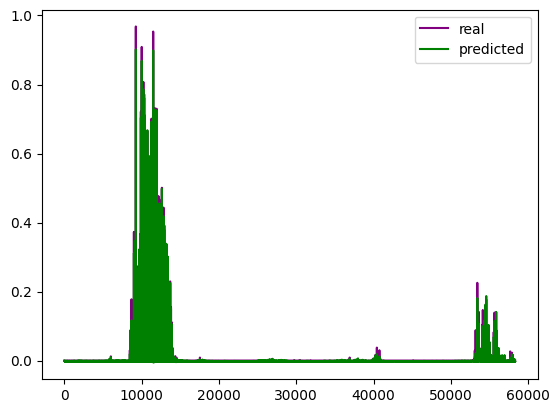

Fold 1:
  Train Size=(233280,)
  Test Size=(58320,)
  Train: index=[     1      3      4 ... 291596 291597 291599]
  Test:  index=[     0      2      5 ... 291588 291590 291598]
0.9937866925886271
Mean Squared Error: 0.00000248
Mean Absolute Error: 0.00078143


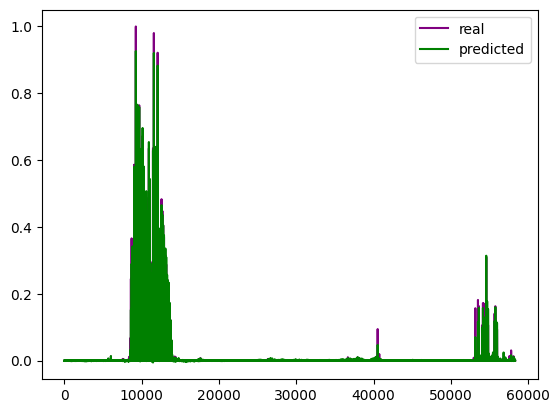

Fold 2:
  Train Size=(233280,)
  Test Size=(58320,)
  Train: index=[     0      1      2 ... 291595 291598 291599]
  Test:  index=[     6     16     19 ... 291589 291596 291597]
0.9928987908792516
Mean Squared Error: 0.00000373
Mean Absolute Error: 0.00073070


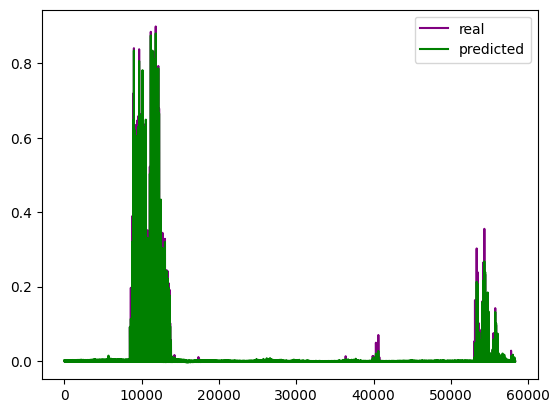

Fold 3:
  Train Size=(233280,)
  Test Size=(58320,)
  Train: index=[     0      2      4 ... 291596 291597 291598]
  Test:  index=[     1      3      7 ... 291593 291595 291599]
0.9916497075701511
Mean Squared Error: 0.00000444
Mean Absolute Error: 0.00132484


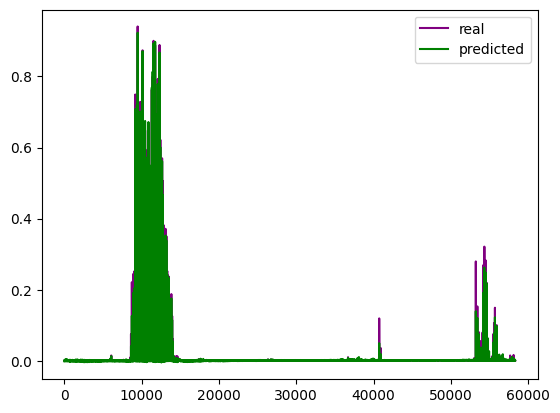

Fold 4:
  Train Size=(233280,)
  Test Size=(58320,)
  Train: index=[     0      1      2 ... 291597 291598 291599]
  Test:  index=[     4     10     21 ... 291558 291586 291594]
0.8145594091888593
Mean Squared Error: 0.00006950
Mean Absolute Error: 0.00803601


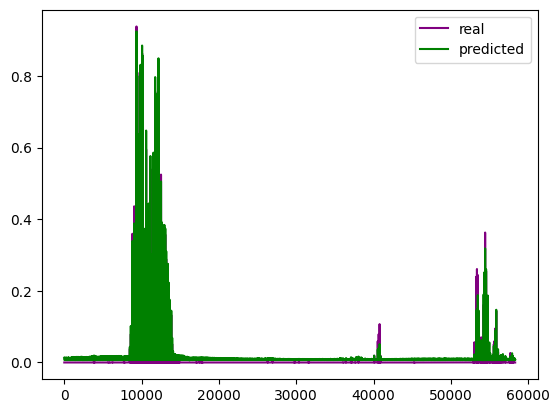

In [13]:
for i, (train_index, test_index) in enumerate(kf.split(df)):
  print(f"Fold {i}:")
  print(f"  Train Size={train_index.shape}")
  print(f"  Test Size={test_index.shape}")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

  X_train, X_test = df.values[train_index], df.values[test_index]
  X_train = np.delete(X_train, 513, 1)
  X_test = np.delete(X_test, 513, 1)

  Y_train, Y_test = df.values[train_index][:,513], df.values[test_index][:, 513]

  mlp.fit(X_train, Y_train)
  Y_pred = mlp.predict(X_test)

  mse = mean_squared_error(Y_test, Y_pred)
  mae = mean_absolute_error(Y_test, Y_pred)
  mape = mean_absolute_percentage_error(Y_test, Y_pred)

  print(mlp.score(X_test, Y_test))
  print(f'Mean Squared Error: {mse:.8f}')
  print(f'Mean Absolute Error: {mae:.8f}')

  # Gráficos sobrepostos
  plt.plot(Y_test, label='real', color='purple')
  plt.plot(Y_pred, label='predicted', color='green')
  plt.legend()
  plt.show()